# Training FFNN on ALL Three Datasets

In [1]:
import pandas as pd

diabetes_012_health_indicators_BRFSS2015 = 'https://raw.githubusercontent.com/Panta-Rhei-LZ/DS-9000-Project-Data/refs/heads/main/diabetes_012_health_indicators_BRFSS2015.csv'
diabetes_binary_health_indicators_BRFSS2015 = 'https://raw.githubusercontent.com/Panta-Rhei-LZ/DS-9000-Project-Data/refs/heads/main/diabetes_binary_health_indicators_BRFSS2015.csv'
diabetes_binary_5050split_health_indicators_BRFSS2015 = 'https://raw.githubusercontent.com/Panta-Rhei-LZ/DS-9000-Project-Data/refs/heads/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'

# Load the CSV file
diabetes_012_health_indicators_BRFSS2015 = pd.read_csv(diabetes_012_health_indicators_BRFSS2015)
diabetes_binary_health_indicators_BRFSS2015 = pd.read_csv(diabetes_binary_health_indicators_BRFSS2015)
diabetes_binary_5050split_health_indicators_BRFSS2015 = pd.read_csv(diabetes_binary_5050split_health_indicators_BRFSS2015)

In [ ]:
import seaborn as sns
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset, WeightedRandomSampler
from torchvision import transforms
from IPython.display import clear_output
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

In [303]:
# diabetes012 dataset
# `diabetes_012_health_indicators_BRFSS2015`
df = diabetes_012_health_indicators_BRFSS2015

# Separate the data by class
class_0 = df[df['Diabetes_012'] == 0]
class_1 = df[df['Diabetes_012'] == 1]
class_2 = df[df['Diabetes_012'] == 2]

# Determine the number of samples of minority classes
min_class_size = len(class_1)

# Randomly undersample class 0 and class 2 to match the size of the minority classes
class_0_undersampled = class_0.sample(n=min_class_size, random_state=11)
class_2_undersampled = class_2.sample(n=min_class_size, random_state=11)

# Combine the undersampled class 0 data and undersampled class 2 with class 1 data
df_balanced = pd.concat([class_0_undersampled, class_1, class_2_undersampled])

# Shuffle the combined dataset
df_balanced = df_balanced.sample(frac=1, random_state=11).reset_index(drop=True)

# Split the features and labels
X_diabetes012 = df_balanced.drop(['Diabetes_012'], axis=1)
y_diabetes012 = df_balanced['Diabetes_012']

X_train_diabetes012, X_test_diabetes012, y_train_diabetes012, y_test_diabetes012 = train_test_split(
    X_diabetes012, y_diabetes012, test_size=0.2, stratify=y_diabetes012, random_state=11
)

# Convert to PyTorch tensors
X_train_diabetes012_tensor = torch.tensor(X_train_diabetes012.values, dtype=torch.float32)
X_test_diabetes012_tensor = torch.tensor(X_test_diabetes012.values, dtype=torch.float32)
y_train_diabetes012_tensor = torch.tensor(y_train_diabetes012.values, dtype=torch.long)
y_test_diabetes012_tensor = torch.tensor(y_test_diabetes012.values, dtype=torch.long)

# Create TensorDatasets
train_dataset_diabetes012 = TensorDataset(X_train_diabetes012_tensor, y_train_diabetes012_tensor)
test_dataset_diabetes012 = TensorDataset(X_test_diabetes012_tensor, y_test_diabetes012_tensor)

# Create DataLoaders
train_loader_diabetes012 = DataLoader(train_dataset_diabetes012, batch_size=128, shuffle=True)
test_loader_diabetes012 = DataLoader(test_dataset_diabetes012, batch_size=128, shuffle=False)

In [ ]:
# diabetes_binary dataset
# `diabetes_binary_health_indicators_BRFSS2015`
X_diabetes01 = diabetes_binary_health_indicators_BRFSS2015.drop(['Diabetes_binary'], axis=1)
y_diabetes01 = diabetes_binary_health_indicators_BRFSS2015.Diabetes_binary

X_train_diabetes01, X_test_diabetes01, y_train_diabetes01, y_test_diabetes01 = train_test_split(
    X_diabetes01, y_diabetes01, test_size=0.2, stratify=y_diabetes01, random_state=11
)

# Convert to PyTorch tensors
X_train_diabetes01_tensor = torch.tensor(X_train_diabetes01.values, dtype=torch.float32)
X_test_diabetes01_tensor = torch.tensor(X_test_diabetes01.values, dtype=torch.float32)
y_train_diabetes01_tensor = torch.tensor(y_train_diabetes01.values, dtype=torch.long)
y_test_diabetes01_tensor = torch.tensor(y_test_diabetes01.values, dtype=torch.long)

# Create TensorDatasets
train_dataset_diabetes01 = TensorDataset(X_train_diabetes01_tensor, y_train_diabetes01_tensor)
test_dataset_diabetes01 = TensorDataset(X_test_diabetes01_tensor, y_test_diabetes01_tensor)

# Create DataLoaders
train_loader_diabetes01 = DataLoader(train_dataset_diabetes01, batch_size=128, shuffle=True)
test_loader_diabetes01 = DataLoader(test_dataset_diabetes01, batch_size=128, shuffle=False)

In [146]:
# 5050-split binary dataset
# `diabetes_binary_5050split_health_indicators_BRFSS2015`
X_diabetes01_5050 = diabetes_binary_5050split_health_indicators_BRFSS2015.drop(['Diabetes_binary'], axis=1)
y_diabetes01_5050 = diabetes_binary_5050split_health_indicators_BRFSS2015.Diabetes_binary

X_train_diabetes01_5050, X_test_diabetes01_5050, y_train_diabetes01_5050, y_test_diabetes01_5050 = train_test_split(
    X_diabetes01_5050, y_diabetes01_5050, test_size=0.2, stratify=y_diabetes01_5050, random_state=11
)

# Convert to PyTorch tensors
X_train_diabetes01_5050_tensor = torch.tensor(X_train_diabetes01_5050.values, dtype=torch.float32)
X_test_diabetes01_5050_tensor = torch.tensor(X_test_diabetes01_5050.values, dtype=torch.float32)
y_train_diabetes01_5050_tensor = torch.tensor(y_train_diabetes01_5050.values, dtype=torch.float32)
y_test_diabetes01_5050_tensor = torch.tensor(y_test_diabetes01_5050.values, dtype=torch.float32)

# Create TensorDatasets
train_dataset_diabetes01_5050 = TensorDataset(X_train_diabetes01_5050_tensor, y_train_diabetes01_5050_tensor)
test_dataset_diabetes01_5050 = TensorDataset(X_test_diabetes01_5050_tensor, y_test_diabetes01_5050_tensor)

# Create DataLoaders
train_loader_diabetes01_5050 = DataLoader(train_dataset_diabetes01_5050, batch_size=64, shuffle=True)
test_loader_diabetes01_5050 = DataLoader(test_dataset_diabetes01_5050, batch_size=64, shuffle=False)

In [129]:
def live_plot(loss, train_acc, valid_acc=None, figsize=(7,5), title=''):
    clear_output(wait=True)
    fig, ax1 = plt.subplots(figsize=figsize)
    ax1.plot(loss, label='Training Loss', color='red')
    ax1.legend(loc='lower left')
    ax1.set_ylabel('Cross Entropy Loss')
    ax2 = ax1.twinx()
    ax2.plot(train_acc, label='Training Accuracy', color='green')
    if valid_acc is not None:
        ax2.plot(valid_acc, label='Validation Accuracy', color='blue')
    ax2.legend(loc='lower right')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_xlabel('Epoch')
    plt.title(title)
    plt.show()

### 1. FFNN on 5050-split Binary

In [206]:
num_features_diabetes01_5050 = X_diabetes01_5050.shape[1]
num_classes_diabetes01_5050 = y_diabetes01_5050.nunique()

In [213]:
class FFNN_diabetes01_5050(nn.Module):
    
    def __init__(self, num_features, num_classes):
        
        super().__init__()
        
        # Define dropout
        self.dropout = nn.Dropout(0.2)

        # Neural Network Architecture
        self.dense1 = nn.Linear(in_features=num_features, out_features=64)
        self.activation1 = nn.Softplus()
        self.dense2 = nn.Linear(in_features=64, out_features=32)
        self.activation2 = nn.Softplus()
        self.dense3 = nn.Linear(in_features=32, out_features=1)
        self.activation3 = nn.Sigmoid()

    def forward(self, x):
        x = self.activation1(self.dense1(x))
        x = self.dropout(x)
        x = self.activation2(self.dense2(x))
        x = self.dropout(x)
        x = self.activation3(self.dense3(x))
        return x

In [ ]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#print(f'Current device is: {device}')
learning_rate = 0.00075
num_epochs=40

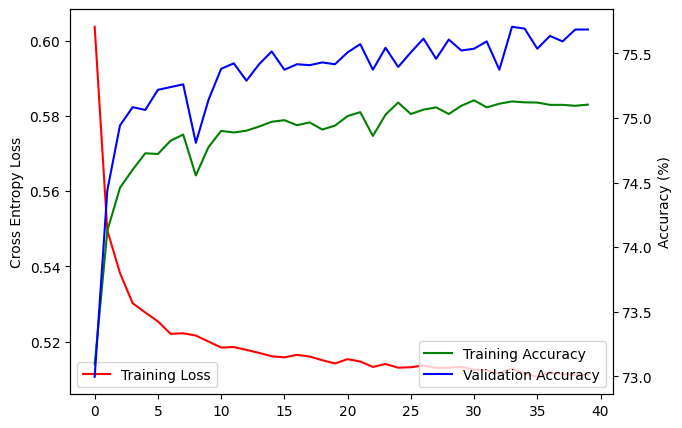

In [215]:
model1 = FFNN_diabetes01_5050(num_features_diabetes01_5050, num_classes_diabetes01_5050)
#model1.to(device)
criterion = nn.BCELoss()
optimizer = optim.Adamax(
    model1.parameters(), 
    lr=learning_rate
)

losses = []
train_accuracies = []
test_accuracies = []

# Training loop
for epoch in range(num_epochs):
    # Set the model to training mode
    model1.train()
    current_loss = 0
    
    for i, data in enumerate(train_loader_diabetes01_5050):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Move the data to GPU
        #inputs = inputs.to(device)
        #labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + Backward + Optimize
        outputs = model1(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()

        # Update running loss
        current_loss += loss.item()
    
    # Find loss for current epoch
    average_loss = current_loss / len(train_loader_diabetes01_5050)
    losses.append(average_loss)

    # Set model to evaluation mode
    model1.eval()

    # Find training accuracy and test accuracy for current epoch
    train_predictions = []
    train_labels = []
    test_predictions = []
    test_labels = []

    with torch.no_grad():
        for inputs, labels in train_loader_diabetes01_5050:
            #inputs = inputs.to(device)
            #labels = labels.to(device)

            # Pass forward
            outputs = model1.forward(inputs)
            predicted = (outputs > 0.5).float()

            # Collect predictions and labels
            train_predictions.extend(predicted.cpu().numpy())
            train_labels.extend(labels.cpu().numpy())

        for inputs, labels in test_loader_diabetes01_5050:
            #inputs = inputs.to(device)
            #labels = labels.to(device)

            # Pass forward
            outputs = model1.forward(inputs)
            predicted = (outputs > 0.5).float()

            # Collect predictions and labels
            test_predictions.extend(predicted.cpu().numpy())
            test_labels.extend(labels.cpu().numpy()) 

    train_accuracies.append(accuracy_score(train_labels, train_predictions) * 100)
    test_accuracies.append(accuracy_score(test_labels, test_predictions) * 100)

    live_plot(np.array(losses), np.array(train_accuracies), test_accuracies)

In [348]:
def confusion_plot_binary(model, inputs, labels, name=''):
    model.eval()
    with torch.no_grad():
        preds = (model.forward(inputs) > 0.5).float()
    accuracy = accuracy_score(labels, preds)
    print(f'{name} accuracy: {accuracy * 100:.2f}')
    
    cf = confusion_matrix(labels, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(f'{name} Confusion Matrix')
    
    return preds

Train accuracy: 75.10
Test accuracy: 75.68


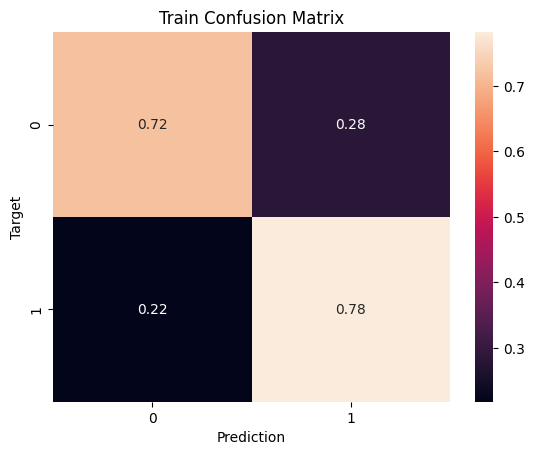

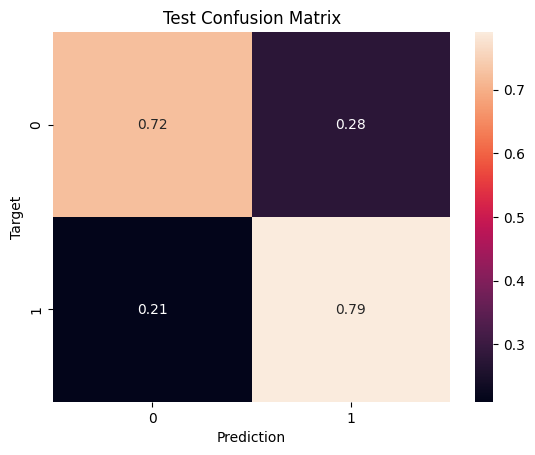

In [349]:
# Predict and plot on the training data
train_preds = confusion_plot_binary(model1, X_train_diabetes01_5050_tensor, y_train_diabetes01_5050, 'Train')

# Predict and plot on the validation data
val_preds = confusion_plot_binary(model1, X_test_diabetes01_5050_tensor, y_test_diabetes01_5050, 'Test')

### 1. FFNN on diabetes_012 Multiclass

In [299]:
num_features_diabetes012 = X_diabetes012.shape[1]
num_classes_diabetes012 = y_diabetes012.nunique()

In [307]:
class FFNN_diabetes012(nn.Module):
    
    def __init__(self, num_features, num_classes):
        
        super().__init__()
        
        # Define dropout
        self.dropout = nn.Dropout(0.2)

        # Neural Network Architecture
        self.dense1 = nn.Linear(in_features=num_features, out_features=64)
        self.activation1 = nn.GELU()
        self.dense2 = nn.Linear(in_features=64, out_features=16)
        self.activation2 = nn.GELU()
        self.dense3 = nn.Linear(in_features=16, out_features=num_classes)

    def forward(self, x):
        x = self.activation1(self.dense1(x))
        x = self.dropout(x)
        x = self.activation2(self.dense2(x))
        x = self.dropout(x)
        x = self.dense3(x)
        return x

In [326]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#print(f'Current device is: {device}')
learning_rate = 0.00025
num_epochs=50

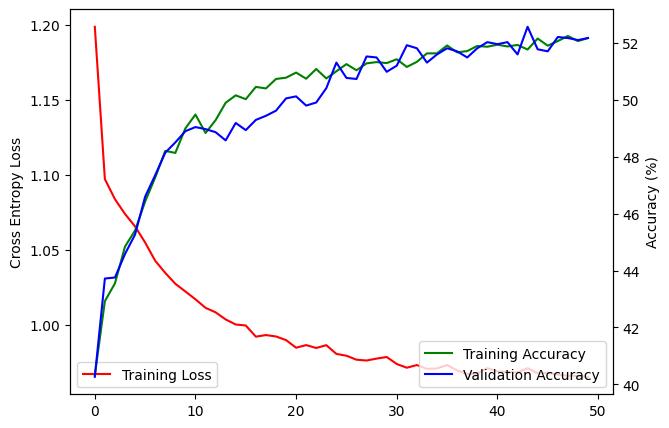

In [327]:
model2 = FFNN_diabetes012(num_features_diabetes012, num_classes_diabetes012)
#model2.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    model2.parameters(), 
    lr=learning_rate
)

losses = []
train_accuracies = []
test_accuracies = []

# Training loop
for epoch in range(num_epochs):
    # Set the model to training mode
    model2.train()
    current_loss = 0
    
    for i, data in enumerate(train_loader_diabetes012):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Move the data to GPU
        #inputs = inputs.to(device)
        #labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + Backward + Optimize
        outputs = model2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Update running loss
        current_loss += loss.item()
    
    # Find loss for current epoch
    average_loss = current_loss / len(train_loader_diabetes012)
    losses.append(average_loss)

    # Set model to evaluation mode
    model2.eval()

    # Find training accuracy and test accuracy for current epoch
    train_predictions = []
    train_labels = []
    test_predictions = []
    test_labels = []

    with torch.no_grad():
        for inputs, labels in train_loader_diabetes012:
            #inputs = inputs.to(device)
            #labels = labels.to(device)

            # Pass forward
            outputs = model2.forward(inputs)
            predicted = torch.argmax(outputs, dim=1)

            # Collect predictions and labels
            train_predictions.extend(predicted.cpu().numpy())
            train_labels.extend(labels.cpu().numpy())

        for inputs, labels in test_loader_diabetes012:
            #inputs = inputs.to(device)
            #labels = labels.to(device)

            # Pass forward
            outputs = model2.forward(inputs)
            predicted = torch.argmax(outputs, dim=1)

            # Collect predictions and labels
            test_predictions.extend(predicted.cpu().numpy())
            test_labels.extend(labels.cpu().numpy()) 

    train_accuracies.append(accuracy_score(train_labels, train_predictions) * 100)
    test_accuracies.append(accuracy_score(test_labels, test_predictions) * 100)

    live_plot(np.array(losses), np.array(train_accuracies), test_accuracies)

In [354]:
def confusion_plot_multiclass(model, inputs, labels, name='', classes=[0, 1, 2]):
    model.eval()
    
    with torch.no_grad():
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1) 

    preds = preds
    labels = labels
    
    # Calculate accuracy
    accuracy = accuracy_score(labels, preds)
    print(f'{name} accuracy: {accuracy * 100:.2f}%')

    # Compute the confusion matrix
    cf = confusion_matrix(labels, preds, labels=classes, normalize='true')

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf, annot=True, xticklabels=classes, yticklabels=classes, cmap="Blues", fmt=".2f")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    return preds

Train accuracy: 52.18%


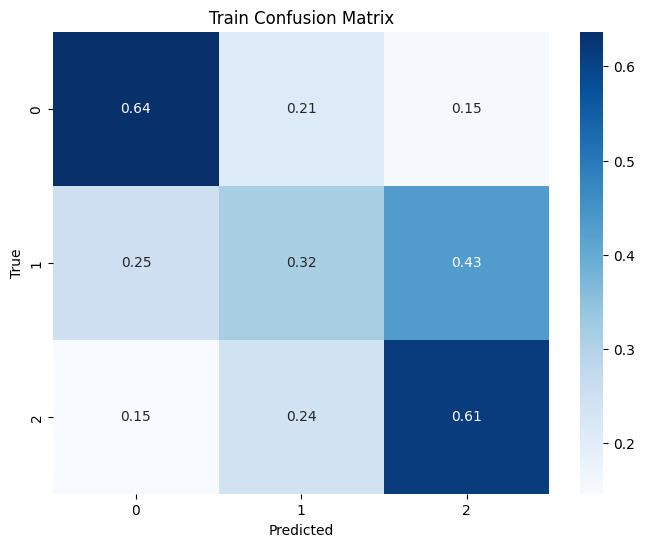

Test accuracy: 52.18%


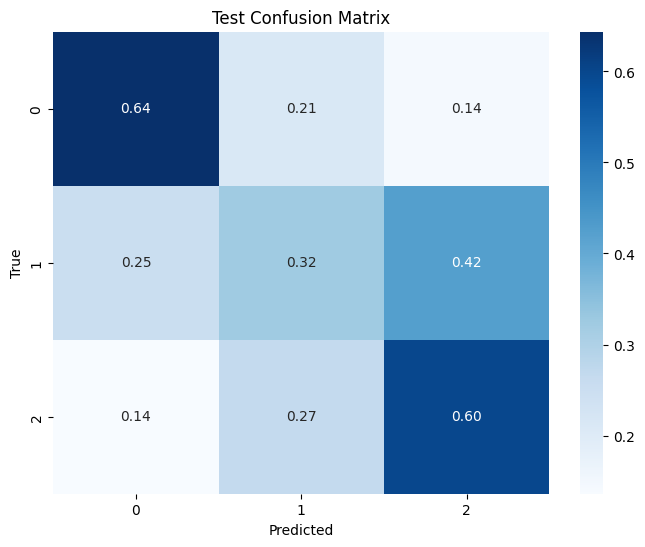

In [353]:
# Predict and plot on the training data
train_preds = confusion_plot_multiclass(model2, X_train_diabetes012_tensor, y_train_diabetes012, 'Train', classes=[0, 1, 2])

# Predict and plot on the validation data
val_preds = confusion_plot_multiclass(model2, X_test_diabetes012_tensor, y_test_diabetes012, 'Test', classes=[0, 1, 2])